# MicroArray Data Analysis

```python
# If you have any questions, please run the following command to send me a message :)
from teilab.question import ask
ask(text="I have a question about...")
```

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 200)

### Prepare Required Data

Some data are **"unpublished"**, so please treat it carefully.

In [2]:
from teilab.datasets import TeiLabDataSets

In [3]:
datasets = TeiLabDataSets(verbose=False)

In [4]:
data_dir1 = datasets.get_data(password="<>")
data_dir2 = datasets.get_data(password="<>")

In [5]:
datasets.samples.show_groups()

  idx  Condition              gn  GroupName                              FileName
-----  -------------------  ----  -------------------------------------  ---------------------------------------------------
    0  mock                    0  SG19378659_257236339458_S001_GE1_1200  SG19378659_257236339458_S001_GE1_1200_Jun14_1_1.txt
    1  siVIM-270               0  SG19378659_257236339458_S001_GE1_1200  SG19378659_257236339458_S001_GE1_1200_Jun14_1_2.txt
    2  siVIM-270(2'OMe2-5)     0  SG19378659_257236339458_S001_GE1_1200  SG19378659_257236339458_S001_GE1_1200_Jun14_1_3.txt
    3  siVIM-270(2'OMe6-8)     0  SG19378659_257236339458_S001_GE1_1200  SG19378659_257236339458_S001_GE1_1200_Jun14_1_4.txt
    4  siVIM-270(2'OMe2-8)     0  SG19378659_257236339458_S001_GE1_1200  SG19378659_257236339458_S001_GE1_1200_Jun14_2_1.txt
    5  mock(1)                 1  US91503671_253949442637_S01_GE1_105    US91503671_253949442637_S01_GE1_105_Dec08_1_1.txt
    6  siVIM-270(LNA3-5)       1  US91503671_

### 2. Read Data & Merge

In [6]:
sample_numbers = datasets.samples.get_group_numbers(group_no=1)
sample_conditions = datasets.samples.Condition[sample_numbers]
print("sample_numbers   :", sample_numbers)
print("sample_conditions:", sample_conditions)

sample_numbers   : [5, 6, 7, 8, 9, 10, 11, 12]
sample_conditions: ['mock(1)' 'siVIM-270(LNA3-5)' 'siVIM-270(LNA2-8)' 'mock(2)' 'siVIM-270'
 "siVIM-270(2'OMe4-6)" "siVIM-270(2'OMe3-7)" "siVIM-270(2'OMe2-8)"]


In [7]:
df_anno = datasets.read_data(no=sample_numbers[0], usecols=datasets.ANNO_COLNAMES + ["GeneName"])
reliable_index = set(df_anno.index)
print(f"[Before] The number of data: {len(df_anno)}")

df_combined = df_anno.copy(deep=True)
for no in sample_numbers:
    df_data = datasets.read_data(no=no)
    reliable_index = reliable_index & set(datasets.reliable_filter(df=df_data))
    df_combined = pd.concat([
        df_combined, 
        df_data[[datasets.TARGET_COLNAME]].rename(columns={datasets.TARGET_COLNAME: datasets.samples.Condition[no]})
    ], axis=1)

df_combined = df_combined.loc[reliable_index, :].reset_index(drop=True)
print(f"[After] The number of data: {len(df_combined)}")

[Before] The number of data: 62976
[After] The number of data: 20947


In [8]:
df_combined.head(3)

,FeatureNum,ProbeName,GeneName,SystematicName,mock(1),siVIM-270(LNA3-5),siVIM-270(LNA2-8),mock(2),siVIM-270,siVIM-270(2'OMe4-6),siVIM-270(2'OMe3-7),siVIM-270(2'OMe2-8)
0,4,A_23_P117082,HEBP1,NM_015987,12566.870,14213.960,13553.84,12416.270,12356.960,12896.740,12860.240,13869.810
1,9,A_21_P0000509,SNAR-G2,NR_024244,122723.700,113802.500,107326.70,117447.400,117958.900,118623.000,128495.100,124273.000
2,10,A_21_P0000744,LOC100506844,NR_038269,1234.146,1302.718,1264.15,1251.119,1281.739,1128.132,1199.297,1141.723


### 3. Normalization

In [9]:
from teilab.utils import subplots_create
from teilab.normalizations import percentile, quantile
from teilab.plot.matplotlib import density_plot, boxplot

In [10]:
data = df_combined[sample_conditions].values.T
SystematicNames = df_combined["SystematicName"].values
n_samples, n_features = data.shape
print(
    f"Number of Samples : {n_samples}",
    f"Number of Features: {n_features}",
    sep="\n"
)

Number of Samples : 8
Number of Features: 20947


#### 3.1 Raw Data

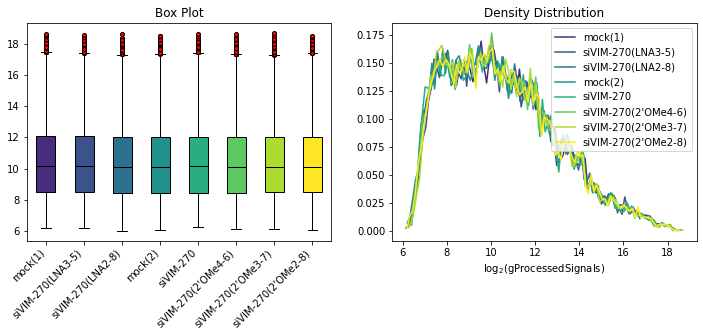

In [11]:
fig, axes = subplots_create(ncols=2, figsize=(12,4), style="matplotlib")
_ = boxplot(data=np.log2(data), ax=axes[0])
_ = axes[0].set_xticklabels(sample_conditions, rotation=45, ha="right")
_ = density_plot(data=np.log2(data), labels=sample_conditions, ax=axes[1], xlabel="$\log_{2}(\mathrm{gProcessedSignals})$")
# fig.show()

#### 3.2 percentile

In [12]:
data_75percentiled = percentile(data=data, percent=75)

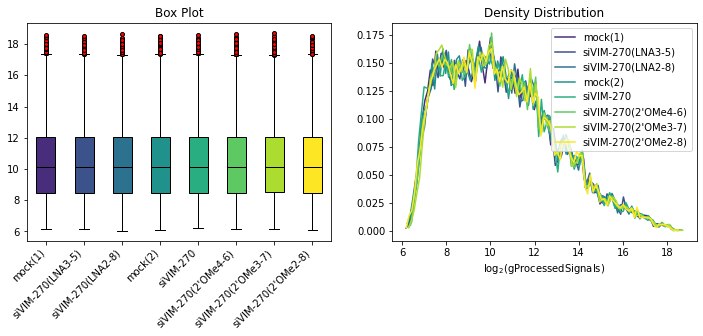

In [13]:
fig, axes = subplots_create(ncols=2, figsize=(12,4), style="matplotlib")
_ = boxplot(data=np.log2(data_75percentiled), ax=axes[0])
_ = axes[0].set_xticklabels(sample_conditions, rotation=45, ha="right")
_ = density_plot(data=np.log2(data_75percentiled), labels=sample_conditions, ax=axes[1], xlabel="$\log_{2}(\mathrm{gProcessedSignals})$")
# fig.show()

#### 3.2 quantile

In [14]:
data_quantiled = quantile(data=data)

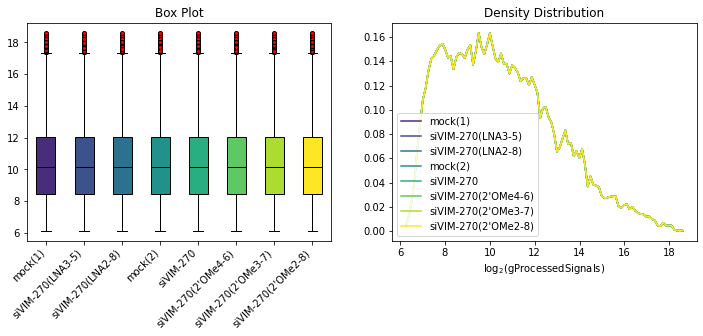

In [15]:
fig, axes = subplots_create(ncols=2, figsize=(12,4), style="matplotlib")
_ = boxplot(data=np.log2(data_quantiled), ax=axes[0])
_ = axes[0].set_xticklabels(sample_conditions, rotation=45, ha="right")
_ = density_plot(data=np.log2(data_quantiled), labels=sample_conditions, ax=axes[1], xlabel="$\log_{2}(\mathrm{gProcessedSignals})$")
# fig.show()

#### 3.3 Comparison

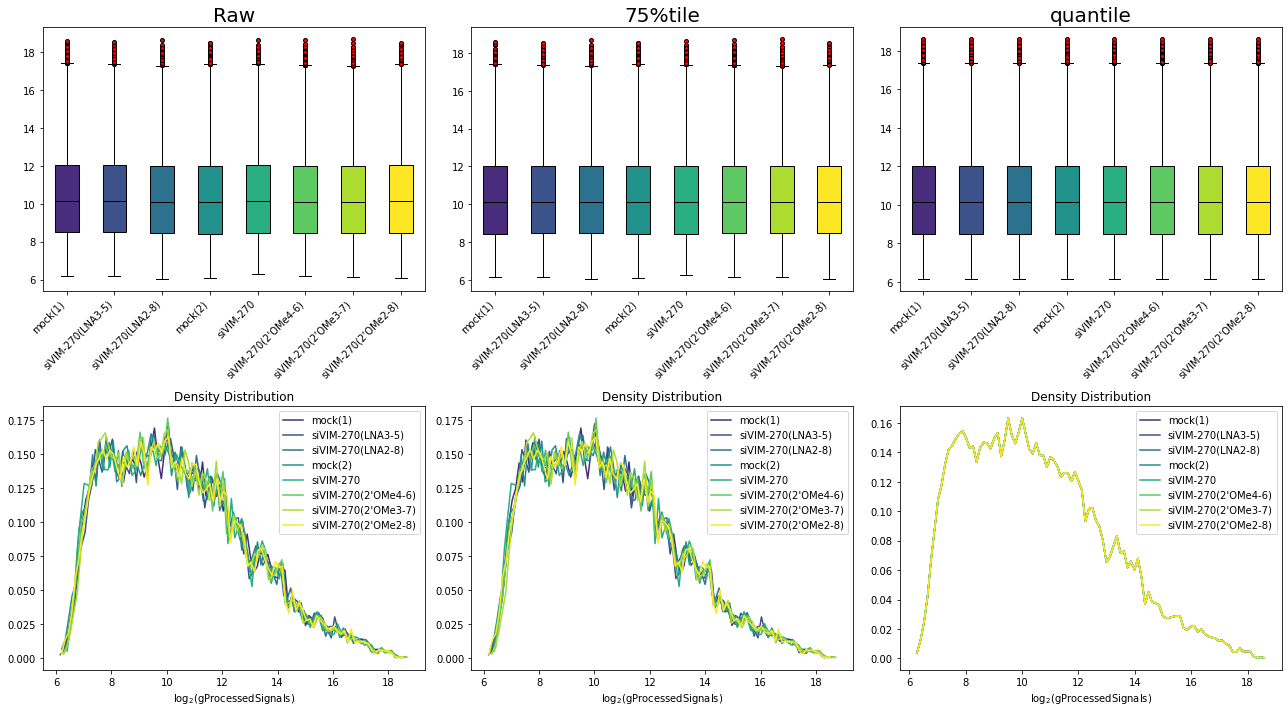

In [16]:
fig, axes = subplots_create(ncols=3, nrows=2, figsize=(18,10), style="matplotlib")
for col,(d,title) in enumerate(zip([data,data_75percentiled,data_quantiled],["Raw","75%tile","quantile"])):
    axU = boxplot(data=np.log2(d), ax=axes[0,col])
    axU.set_title(title, fontsize=20)
    _ = axes[0,col].set_xticklabels(sample_conditions, rotation=45, ha="right")
    _ = density_plot(data=np.log2(d), labels=sample_conditions, ax=axes[1,col], xlabel="$\log_{2}(\mathrm{gProcessedSignals})$")
fig.tight_layout()
# fig.show()

### 4. Summarization

#### 4.1 Summarization about features (spots)

Average spot values with the same `GeneName`

In [17]:
from teilab.normalizations import median_polish

In [18]:
# Summarization (Median Polish)
data_median_polished               = median_polish(data=data,               labels=SystematicNames)
data_75percentiled_median_polished = median_polish(data=data_75percentiled, labels=SystematicNames)
data_quantiled_median_polished     = median_polish(data=data_quantiled,     labels=SystematicNames)

median polish: 100%|██████████| 14096/14096 [00:29<00:00, 473.18it/s]


In [19]:
# Grouping Function. (Average for "gProcessedSignal"s, Leave only one for "SystematicName"s)
grouping_func = {c:"mean" for c in sample_conditions}
grouping_func.update({"SystematicName": lambda x:x.iloc[0]})

##### 4.1.1 Median Polish for "Raw data"

In [20]:
df_median_polished = df_combined.copy(deep=True)
df_median_polished[sample_conditions] = data_median_polished.T
print(f"DataFrame shape={df_median_polished.shape}")
df_median_polished.head(3)

DataFrame shape=(20947, 12)


,FeatureNum,ProbeName,GeneName,SystematicName,mock(1),siVIM-270(LNA3-5),siVIM-270(LNA2-8),mock(2),siVIM-270,siVIM-270(2'OMe4-6),siVIM-270(2'OMe3-7),siVIM-270(2'OMe2-8)
0,4,A_23_P117082,HEBP1,NM_015987,13068.588611,13474.455833,12905.172500,12686.050833,12561.897500,12895.552500,12663.065833,13870.997500
1,9,A_21_P0000509,SNAR-G2,NR_024244,122723.700000,113802.500000,107326.700000,117447.400000,117958.900000,118623.000000,128495.100000,124273.000000
2,10,A_21_P0000744,LOC100506844,NR_038269,1240.147425,1265.226125,1223.254375,1236.056925,1288.363225,1156.662275,1193.295575,1168.079175


In [21]:
df_median_polished_summarized = df_median_polished.groupby("GeneName").agg(func=grouping_func).reset_index()
print(f"DataFrame shape={df_median_polished_summarized.shape}")
df_median_polished_summarized.head(3)

DataFrame shape=(13177, 10)


,GeneName,mock(1),siVIM-270(LNA3-5),siVIM-270(LNA2-8),mock(2),siVIM-270,siVIM-270(2'OMe4-6),siVIM-270(2'OMe3-7),siVIM-270(2'OMe2-8),SystematicName
0,A2LD1,235.5315,234.0807,213.4298,204.41620,263.5249,229.0729,263.4997,235.3190,NM_033110
1,A2MP1,108.8655,120.2935,102.3202,96.55369,166.9259,120.8465,129.5464,104.7516,NR_040112
2,A4GALT,13998.0900,12226.7700,11310.1300,14078.95000,15214.2600,13677.1000,11962.7300,12362.7400,NM_017436


##### 4.1.2 Median Polish for "Percentiled data"

In [22]:
df_75percentiled_median_polished = df_combined.copy(deep=True)
df_75percentiled_median_polished[sample_conditions] = data_75percentiled_median_polished.T
print(f"DataFrame shape={df_75percentiled_median_polished.shape}")
df_75percentiled_median_polished.head(3)

DataFrame shape=(20947, 12)


,FeatureNum,ProbeName,GeneName,SystematicName,mock(1),siVIM-270(LNA3-5),siVIM-270(LNA2-8),mock(2),siVIM-270,siVIM-270(2'OMe4-6),siVIM-270(2'OMe3-7),siVIM-270(2'OMe2-8)
0,4,A_23_P117082,HEBP1,NM_015987,12598.448041,13101.125634,13182.422210,12993.093334,12370.017143,13112.418427,12933.722572,13774.269665
1,9,A_21_P0000509,SNAR-G2,NR_024244,119058.698939,111054.773888,109360.951772,119987.557206,116386.636478,120542.989273,130875.683414,123479.112148
2,10,A_21_P0000744,LOC100506844,NR_038269,1213.039246,1242.818762,1241.119939,1256.635392,1275.953795,1170.928392,1210.216974,1163.212465


In [23]:
df_75percentiled_median_polished_summarized = df_75percentiled_median_polished.groupby("GeneName").agg(func=grouping_func).reset_index()
print(f"DataFrame shape={df_75percentiled_median_polished_summarized.shape}")
df_75percentiled_median_polished_summarized.head(3)

DataFrame shape=(13177, 10)


,GeneName,mock(1),siVIM-270(LNA3-5),siVIM-270(LNA2-8),mock(2),siVIM-270,siVIM-270(2'OMe4-6),siVIM-270(2'OMe3-7),siVIM-270(2'OMe2-8),SystematicName
0,A2LD1,228.497625,228.428894,217.475112,208.837322,260.012400,232.780592,268.381466,233.815722,NM_033110
1,A2MP1,105.614358,117.389051,104.259559,98.641957,164.700960,122.802478,131.946460,104.082420,NR_040112
2,A4GALT,13580.053266,11931.558426,11524.500255,14383.450111,15011.470503,13898.472628,12184.359281,12283.763641,NM_017436


#### 4.1.3 Median Polish for "Quantiled data"

In [24]:
df_quantiled_median_polished = df_combined.copy(deep=True)
df_quantiled_median_polished[sample_conditions] = data_quantiled_median_polished.T
print(f"DataFrame shape={df_quantiled_median_polished.shape}")
df_quantiled_median_polished.head(3)

DataFrame shape=(20947, 12)


,FeatureNum,ProbeName,GeneName,SystematicName,mock(1),siVIM-270(LNA3-5),siVIM-270(LNA2-8),mock(2),siVIM-270,siVIM-270(2'OMe4-6),siVIM-270(2'OMe3-7),siVIM-270(2'OMe2-8)
0,4,A_23_P117082,HEBP1,NM_015987,12586.353740,13021.581832,13251.970343,12894.303166,12301.554529,12938.840130,12852.496197,13931.053533
1,9,A_21_P0000509,SNAR-G2,NR_024244,117034.887706,112705.329312,110467.983571,118311.421632,116103.663345,118657.150848,128737.018334,126902.054704
2,10,A_21_P0000744,LOC100506844,NR_038269,1218.409947,1240.976980,1233.274896,1260.055337,1285.594276,1165.553228,1202.798890,1170.284742


In [25]:
df_quantiled_median_polished_summarized = df_quantiled_median_polished.groupby("GeneName").agg(func=grouping_func).reset_index()
print(f"DataFrame shape={df_quantiled_median_polished_summarized.shape}")
df_quantiled_median_polished_summarized.head(3)

DataFrame shape=(13177, 10)


,GeneName,mock(1),siVIM-270(LNA3-5),siVIM-270(LNA2-8),mock(2),siVIM-270,siVIM-270(2'OMe4-6),siVIM-270(2'OMe3-7),siVIM-270(2'OMe2-8),SystematicName
0,A2LD1,234.121371,226.581056,212.906678,210.131555,266.765254,230.068348,260.981391,234.486977,NM_033110
1,A2MP1,107.129935,118.064162,104.292124,102.465729,171.076464,121.116362,124.190931,106.940406,NR_040112
2,A4GALT,13642.142631,11833.594926,11562.898432,14301.129398,15164.113278,13706.919206,12311.177799,12285.874961,NM_017436


#### 4.2 Summarization about samples

Since there are multiple samples for "mock", average them.

In [26]:
df_median_polished_summarized["mock"]               = df_median_polished_summarized[["mock(1)", "mock(2)"]].mean(axis=1)
df_75percentiled_median_polished_summarized["mock"] = df_75percentiled_median_polished_summarized[["mock(1)", "mock(2)"]].mean(axis=1)
df_quantiled_median_polished_summarized["mock"]     = df_quantiled_median_polished_summarized[["mock(1)", "mock(2)"]].mean(axis=1)

In [27]:
print(f"Raw + Median Polish + Summarization")
display(df_median_polished_summarized.head(3))
print(f"75%tile + Median Polish + Summarization")
display(df_75percentiled_median_polished_summarized.head(3))
print(f"Quantile + Median Polish + Summarization")
display(df_quantiled_median_polished_summarized.head(3))

Raw + Median Polish + Summarization


,GeneName,mock(1),siVIM-270(LNA3-5),siVIM-270(LNA2-8),mock(2),siVIM-270,siVIM-270(2'OMe4-6),siVIM-270(2'OMe3-7),siVIM-270(2'OMe2-8),SystematicName,mock
0,A2LD1,235.5315,234.0807,213.4298,204.41620,263.5249,229.0729,263.4997,235.3190,NM_033110,219.973850
1,A2MP1,108.8655,120.2935,102.3202,96.55369,166.9259,120.8465,129.5464,104.7516,NR_040112,102.709595
2,A4GALT,13998.0900,12226.7700,11310.1300,14078.95000,15214.2600,13677.1000,11962.7300,12362.7400,NM_017436,14038.520000


75%tile + Median Polish + Summarization


,GeneName,mock(1),siVIM-270(LNA3-5),siVIM-270(LNA2-8),mock(2),siVIM-270,siVIM-270(2'OMe4-6),siVIM-270(2'OMe3-7),siVIM-270(2'OMe2-8),SystematicName,mock
0,A2LD1,228.497625,228.428894,217.475112,208.837322,260.012400,232.780592,268.381466,233.815722,NM_033110,218.667473
1,A2MP1,105.614358,117.389051,104.259559,98.641957,164.700960,122.802478,131.946460,104.082420,NR_040112,102.128158
2,A4GALT,13580.053266,11931.558426,11524.500255,14383.450111,15011.470503,13898.472628,12184.359281,12283.763641,NM_017436,13981.751688


Quantile + Median Polish + Summarization


,GeneName,mock(1),siVIM-270(LNA3-5),siVIM-270(LNA2-8),mock(2),siVIM-270,siVIM-270(2'OMe4-6),siVIM-270(2'OMe3-7),siVIM-270(2'OMe2-8),SystematicName,mock
0,A2LD1,234.121371,226.581056,212.906678,210.131555,266.765254,230.068348,260.981391,234.486977,NM_033110,222.126463
1,A2MP1,107.129935,118.064162,104.292124,102.465729,171.076464,121.116362,124.190931,106.940406,NR_040112,104.797832
2,A4GALT,13642.142631,11833.594926,11562.898432,14301.129398,15164.113278,13706.919206,12311.177799,12285.874961,NM_017436,13971.636014


### 5. XYplot & MAplot

#### XY plot

In [28]:
from teilab.plot.matplotlib import XYplot

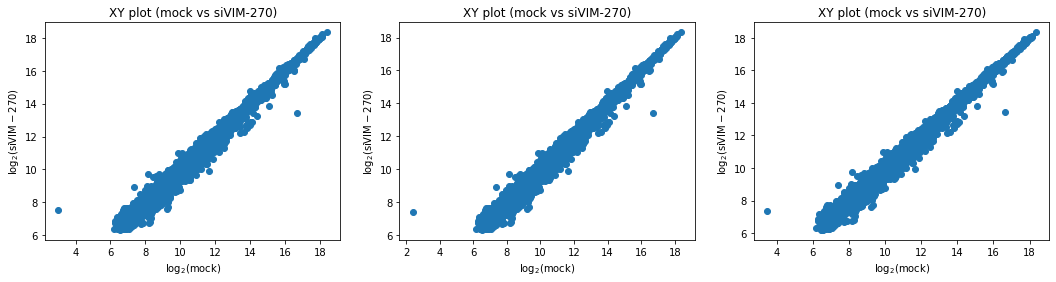

In [29]:
fig, axes = subplots_create(nrows=1, ncols=3, figsize=(18,4), style="matplotlib")
for col,df in enumerate([
    df_median_polished_summarized,
    df_75percentiled_median_polished_summarized,
    df_quantiled_median_polished_summarized,
]):
    _ = XYplot(df=df, x="mock", y="siVIM-270", ax=axes[col])
# fig.show()

#### MA plot

In [30]:
from teilab.plot.matplotlib import MAplot

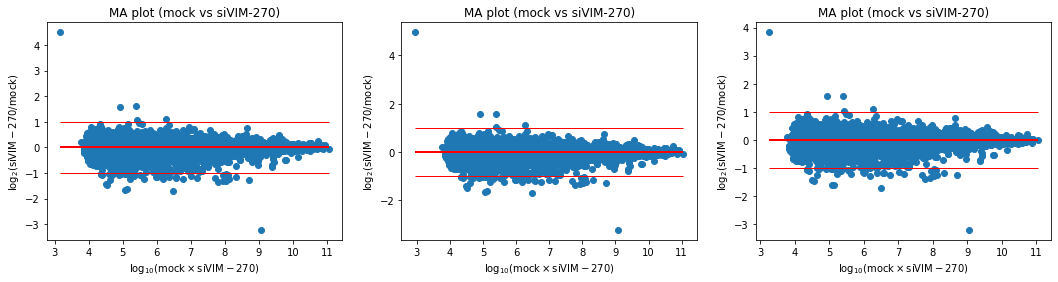

In [31]:
fig, axes = subplots_create(nrows=1, ncols=3, figsize=(18,4), style="matplotlib")
for col,df in enumerate([
    df_median_polished_summarized,
    df_75percentiled_median_polished_summarized,
    df_quantiled_median_polished_summarized,
]):
    _ = MAplot(df=df, x="mock", y="siVIM-270", ax=axes[col], hlines={
        0  : dict(colors='r', linewidths=2),
        1  : dict(colors='r', linewidths=1),
        -1 : dict(colors='r', linewidths=1),
    }) 
# fig.show()

### 6. Seedmatch

Search for mRNA which has `GAGTTCA` (complementary to the seed (`UGAACUC`) of the siRNA guide strand) in its 3'UTR.

#### 6.1 Get seedmatch mRNAs

Visit http://atlas.rnai.jp/seedmatch/ or use `get_matched_mRNAs` to get seedmatch mRNAs.

In [32]:
from teilab.seedmatch import get_matched_mRNAs

In [33]:
df_seedmatch_mRNAs = get_matched_mRNAs(seedseq="GAGTTCA")
df_seedmatch_mRNAs.head(3)

,SystematicName,NumHits
0,NM_001004713,1
1,NM_173860,1
2,NM_001005493,1


#### 6.2 Merge with DataFrame (signal values)

In [34]:
# Raw + Median Polish + Summarization
df_median_polished_summarized_with_is_matched = pd.merge(
    left=df_median_polished_summarized, 
    right=df_seedmatch_mRNAs, 
    on="SystematicName", how="left"
).fillna(0)

# 75%tile + Median Polish + Summarization
df_quantiled_median_polished_summarized_with_is_matched = pd.merge(
    left=df_quantiled_median_polished_summarized, 
    right=df_seedmatch_mRNAs, 
    on="SystematicName", how="left"
).fillna(0)

# Quantile + Median Polish + Summarization
df_quantiled_median_polished_summarized_with_is_matched = pd.merge(
    left=df_quantiled_median_polished_summarized, 
    right=df_seedmatch_mRNAs, 
    on="SystematicName", how="left"
).fillna(0)

#### 6.3 plot cumulative frequency curve

In [35]:
from teilab.plot.matplotlib import cumulative_density_plot

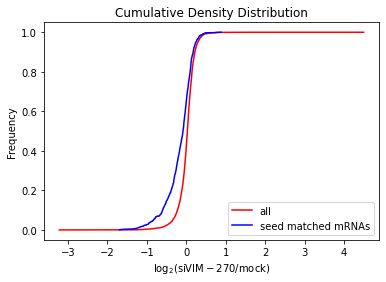

In [36]:
fig,ax = subplots_create(style="matplotlib")

_ = cumulative_density_plot(
    data=np.log2(df_median_polished_summarized_with_is_matched["siVIM-270"]/df_median_polished_summarized_with_is_matched["mock"]), 
    labels=["all"], colors=["red"], xlabel="$\log_2(\mathrm{siVIM-270}/\mathrm{mock})$", ax=ax
)
_ = cumulative_density_plot(
    data=np.log2((df_median_polished_summarized_with_is_matched["siVIM-270"]/df_median_polished_summarized_with_is_matched["mock"])[df_median_polished_summarized_with_is_matched["NumHits"]!=0]), 
    labels=["seed matched mRNAs"], colors=["blue"], xlabel="$\log_2(\mathrm{siVIM-270}/\mathrm{mock})$", 
    ax=ax
)